<a href="https://colab.research.google.com/github/Eliz18Vais/CW1_pandas/blob/main/CW1_Plot%26Pandas_Elizabeth_Vaisman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Elizabeth Vaisman
ID:318775277

### Matplotlib

Your Turn: Create a sinusoidal wave with random noise y=sin(x)+ white noise, where x is evenly spaced between 0 and 2π.

Remove the top and right spines. Customize tick locations: Set major ticks at [0,π/2,π,3π/2,2π], and label accordingly ([0,π/2,π,3π/2,2π]).

Add appropriate titles colorbars and legends where needed.

One more: Generate random data with 1000 points from a standard normal distribution

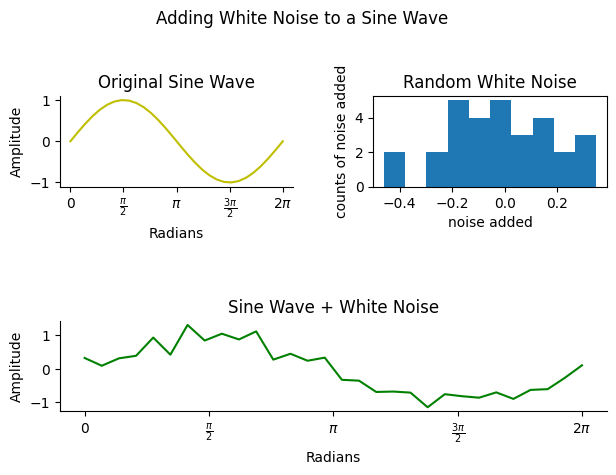

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

pi = np.pi
x = np.linspace(0, 2*pi, 30)
np.random.seed(1)
scale = 0.2
white_noise = scale*np.random.normal(size = len(x)) # multiplying the values of the
# standard distribution by a smaller than 1 parameter so that we'll still be able
# to see the trend of the sine.

origin = np.sin(x)
y = origin + white_noise # data (sine wave) with added white noise

fig = plt.figure()
ax1 = plt.subplot2grid((2,2), (0, 0))
ax1.plot(x, origin, color = 'y')
ax1.set_title('Original Sine Wave')

ax2 =  plt.subplot2grid((2,2), (0, 1))
ax2.hist(white_noise, bins=10)
ax2.set_title("Random White Noise")
ax2.set_xlabel("noise added")
ax2.set_ylabel("counts of noise added")

ax3 =  plt.subplot2grid((2,2), (1, 0), colspan=2)
ax3.plot(x, y, color = 'g')
ax3.set_title('Sine Wave + White Noise')

for ax in [ax1, ax3]:
  ax.set_xticks([0, pi/2, pi, 3*pi/2, 2*pi])
  ax.set_xticklabels([0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
  ax.set_xlabel("Radians")
  ax.set_ylabel("Amplitude")
  ax.spines.right.set_visible(False)
  ax.spines.top.set_visible(False)

fig.tight_layout(h_pad=6, w_pad=3)
fig.suptitle('Adding White Noise to a Sine Wave')
plt.subplots_adjust(top=0.8)
plt.show()

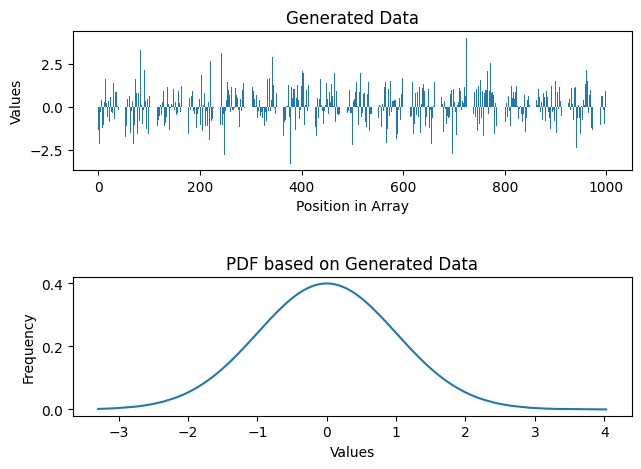

In [ ]:
from scipy.stats import norm

x = np.random.normal(size = 1000)
fig, (ax1, ax2) = plt.subplots(2,1)
pos = np.array(range(len(x)))
ax1.bar(pos,x)
ax1.set_title('Generated Data')
ax1.set_xlabel('Position in Array')
ax1.set_ylabel('Values')

x.sort()
ax2.plot(x, norm.pdf(x))
ax2.set_title('PDF based on Generated Data')
ax2.set_xlabel('Values')
ax2.set_ylabel('Frequency')

fig.tight_layout(h_pad=3)

### Pandas

The file "scores.csv" is part of Kaggle's Depression Dataset.
It contains the following columns:
number (patient identifier), days (number of days of measurements), gender (1 or 2 for female or male), age (age in age groups), afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I), melanch (1: melancholia, 2: no melancholia), inpatient (1: inpatient, 2: outpatient), edu (education grouped in years), marriage (1: married or cohabiting, 2: single), work (1: working or studying, 2: unemployed/sick leave/pension), madrs1 (MADRS score when measurement started), madrs2 (MADRS when measurement stopped).

MADRS (Montgomery-Asberg Depression Rating Scale) levels range from 0 to 60.
Values above 30 represent a severe depression, values below 10 indicate a healthy state.

Tasks:
- Load and Inspect the Data
- Clean if needed
- Explore the dataset
- Don't forget to add appropriate visualization
- Plans: What questions can the dataset address? How can Pandas answer these questions?
- Implement your plans :)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/Eliz18Vais/CW1_pandas/refs/heads/main/scores.csv"
df = pd.read_csv(url)


**Inspect:**

In [ ]:
df.shape

(55, 12)

In [8]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [10]:
# Search for all NaN values:
df.isnull().sum()

,0
number,0
days,0
gender,0
age,0
afftype,32
melanch,35
inpatient,32
edu,2
marriage,32
work,32


Cleaning:

In [3]:
convert_dict = {'gender': 'category', 'afftype': 'category', 'melanch': 'category', 'inpatient': 'category' , 'marriage': 'category' , 'work': 'category' }
df = df.astype(convert_dict)

In [4]:
df_no_cont = df.dropna(inplace = False)
df_no_cont.isnull().sum()

,0
number,0
days,0
gender,0
age,0
afftype,0
melanch,0
inpatient,0
edu,0
marriage,0
work,0


In [ ]:
# Search for any duplicated columns:
print(df.duplicated().sum()) # No column duplications were found

0


In [5]:
patient_control = []
patient_control = ["patient"]*23
patient_control.extend(["control"]*32)
df["group"] = [*patient_control]

**Explore:**

**Testing difference in MADRS before and after data collection:**
For no intervention or unsuccessful intervention we'd expect to see same mdars1 and mdars2 scores.

In [6]:
bins = [0, 10, 30, 60]
names = ['Healthy', 'Mild/Moderate', 'Severe']
df_no_cont['Deprssion Severeness Start'] = pd.cut(df['madrs1'], bins, labels=names)
df_no_cont['Deprssion Severeness End'] = pd.cut(df['madrs2'], bins, labels=names)
df_no_cont['madrs diff scores'] = df['madrs2'] - df['madrs1']
df_no_cont[['inpatient', 'days', 'madrs1', 'madrs2','madrs diff scores', 'Deprssion Severeness Start', 'Deprssion Severeness End']]

<ipython-input-6-ba66b9d9b70e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_cont['Deprssion Severeness Start'] = pd.cut(df['madrs1'], bins, labels=names)
<ipython-input-6-ba66b9d9b70e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_cont['Deprssion Severeness End'] = pd.cut(df['madrs2'], bins, labels=names)
<ipython-input-6-ba66b9d9b70e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,inpatient,days,madrs1,madrs2,madrs diff scores,Deprssion Severeness Start,Deprssion Severeness End
0,2.0,11,19.0,19.0,0.0,Mild/Moderate,Mild/Moderate
1,2.0,18,24.0,11.0,-13.0,Mild/Moderate,Mild/Moderate
2,2.0,13,24.0,25.0,1.0,Mild/Moderate,Mild/Moderate
3,2.0,13,20.0,16.0,-4.0,Mild/Moderate,Mild/Moderate
4,2.0,13,26.0,26.0,0.0,Mild/Moderate,Mild/Moderate
5,2.0,7,18.0,15.0,-3.0,Mild/Moderate,Mild/Moderate
9,2.0,9,28.0,21.0,-7.0,Mild/Moderate,Mild/Moderate
10,2.0,14,24.0,24.0,0.0,Mild/Moderate,Mild/Moderate
11,2.0,12,25.0,21.0,-4.0,Mild/Moderate,Mild/Moderate
12,2.0,14,18.0,13.0,-5.0,Mild/Moderate,Mild/Moderate


In [7]:
print(f'mean difference in madrs score between start and end of check: {df_no_cont["madrs diff scores"].mean()}')

mean difference in madrs score between start and end of check: -3.0


We can see that the scores didn't change too much between start and end of check, this could be for a few reasons: there wasn't any intervention, there was an unsuccessful intervention, the number of days between the two tests wasn't large enough and that's why we couldn't see the potential results of an intervention.
Plus we see that the inpatients like the outpatients have a mild to moderate depression and they don't differ much in MADRS scores.

In [8]:
df_no_cont.groupby('inpatient').madrs1.mean()

<ipython-input-8-5c91a2b7579f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_no_cont.groupby('inpatient').madrs1.mean()


,madrs1
inpatient,
1.0,27.400000
2.0,21.066667


We can see in the table above that the mean madrs scores in the start of check of inpatients (1) was a bit higher and closer to the severe depression boundary vs. the outpatients(2) initial madrs scores.

**How is marriage, gender and MADRS in start of check are correlated?**

<ipython-input-9-5cb094bb9e78>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box_plot.set_xticklabels(['Married/Cohabiting', 'Single'])


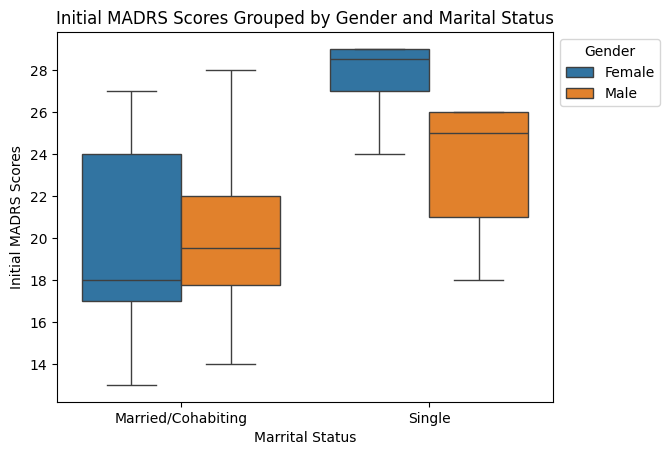

In [9]:
box_plot = sns.boxplot(x = df_no_cont['marriage'], y = df_no_cont['madrs1'], hue = df_no_cont['gender'])
box_plot.set_xticklabels(['Married/Cohabiting', 'Single'])
box_plot.set_xlabel('Marrital Status')
box_plot.set_ylabel('Initial MADRS Scores')
box_plot.set_title('Initial MADRS Scores Grouped by Gender and Marital Status')
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))
box_plot.legend_.texts[0].set_text('Female')
box_plot.legend_.texts[1].set_text('Male')

We can see in the figure above that the mean values of initial MADRS scores are higher for single patients than for married patients.
We can also see a slight difference in the genders where the mean of MARDS is lower for married women rather than married men, but is higher in single women than single men.
Still we can't conclude any significance of the results without performing a statistic analysis.

**Is there a correlation between affiliation type and melancholy?**

In [10]:
from scipy import stats
print(pd.crosstab(df_no_cont.afftype, df_no_cont.melanch))
Cramers_V=stats.chi2_contingency(pd.crosstab(df_no_cont.afftype, df_no_cont.melanch))[0]
degrees_of_freedom = stats.chi2_contingency(pd.crosstab(df_no_cont.afftype, df_no_cont.melanch))[2]
print("Cramer's V =", Cramers_V)
print("Degrees of Freedom =", degrees_of_freedom)



melanch  1.0  2.0
afftype          
1.0        0    5
2.0        1   13
3.0        0    1
Cramer's V = 0.4511278195488722
Degrees of Freedom = 2


We can see that the cramer's V is ~0.45 which describes a large association between the two categorices.
As we see almost all of the petient's tested don't have melancholy (2).

**Plot the distribution of patients' affiliation types:**

([<matplotlib.axis.XTick at 0x7bb489cf8af0>,
 [Text(0, 0, 'Bipolar II'),
  Text(1, 0, 'Unipolar Depressive'),
  Text(2, 0, 'Bipolar I')])

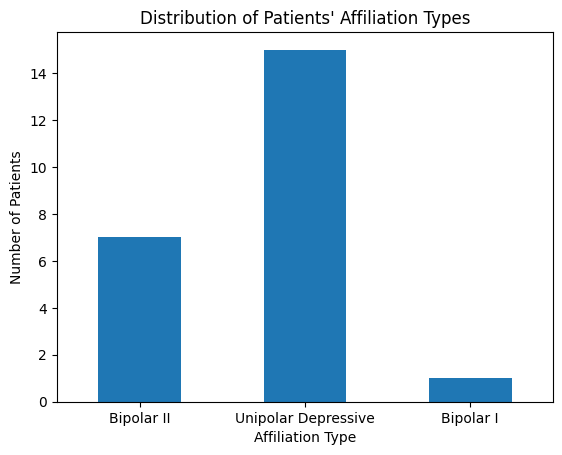

In [14]:
df_afftype = df.dropna(inplace = False, thresh = 11)['afftype']
convert_dict = {'afftype': 'float'}
df_afftype = df_afftype.astype(convert_dict)
values = df_afftype.value_counts()
desired_order = [1.0, 2.0, 3.0]  # Change this order as needed
values = values.reindex(desired_order) # Reindex the values in the desired order
values.plot.bar(rot=0)
plt.xlabel('Affiliation Type')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients\' Affiliation Types')
plt.xticks(ticks = [0,1,2], labels = ['Bipolar II', 'Unipolar Depressive', 'Bipolar I'])

We can see that most patients have a unipolar depressive affiliation type, the second common is bipolar 2 and the third is bipolar 1.